In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime,date

## Loading The Dataset

In [2]:
df=pd.read_excel('../data/Raw_data.xlsx', sheet_name='CustomerDemographic')
df.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

## Data Preprocessing

**Convert the DOB to date-time**

In [6]:
df['DOB'] = pd.to_datetime(df['DOB'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

Here we have successfully converted the DOB column into datetime64[ns]

**Lets Find out the number the Missing Values**

In [8]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [10]:
missing_percentage=df.isnull().mean()*100


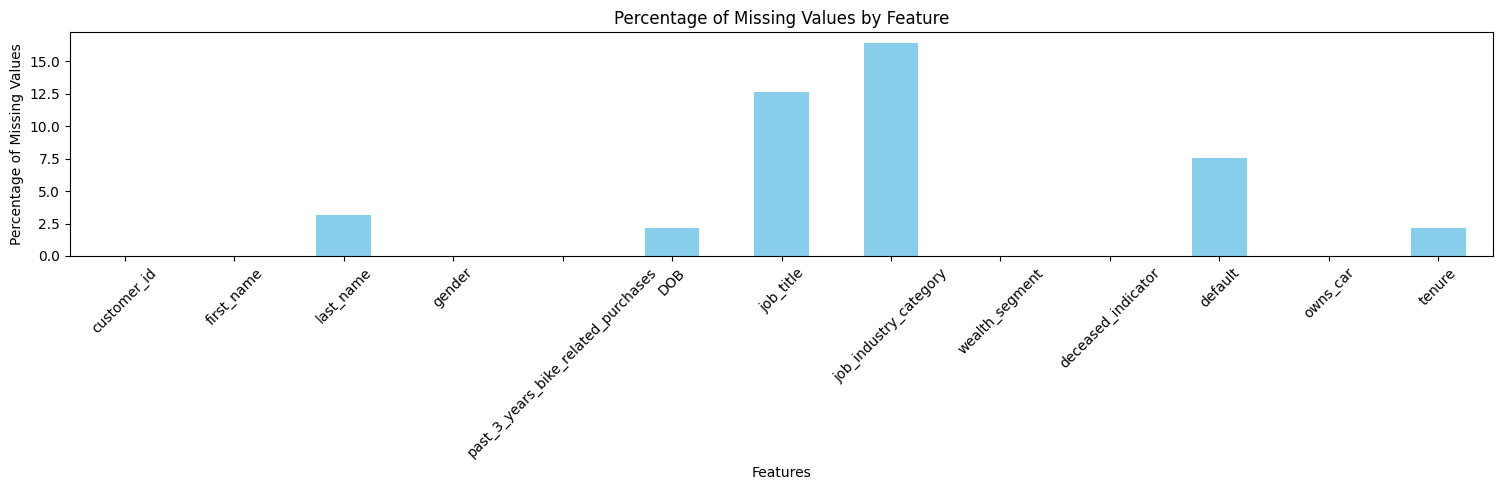

In [13]:
plt.figure(figsize=(15, 5))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Job Title and Job_Industry_Category has high number of missing values


 The updated DataFrame will include a new column called "full_name", which represents the merged first name and last name for each customer. If the last name is missing, the full name will consist only of the first name.

This approach ensures that we have a comprehensive representation of each customer's name, even in cases where the last name is unavailable. 

In [14]:
df['last_name'] = df['last_name'].fillna('')
df['full_name'] = df['first_name'] + ' ' + df['last_name']
df.drop(columns=['first_name', 'last_name'], inplace=True)
df['full_name'].head()


0        Laraine Medendorp
1              Eli Bockman
2             Arlin Dearle
3                  Talbot 
4    Sheila-kathryn Calton
Name: full_name, dtype: object

In [16]:
df.insert(1, 'full_name', df.pop('full_name'))
df.head()

,customer_id,full_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [17]:
df[df['DOB'].isnull()]

,customer_id,full_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
143,144,Jory Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
167,168,Reggie Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
266,267,Edgar Buckler,U,53,NaT,NaN,IT,High Net Worth,N,NaN,No,NaN
289,290,Giorgio Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
450,451,Marlow Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


**Solution for the Missing Values in DOB**

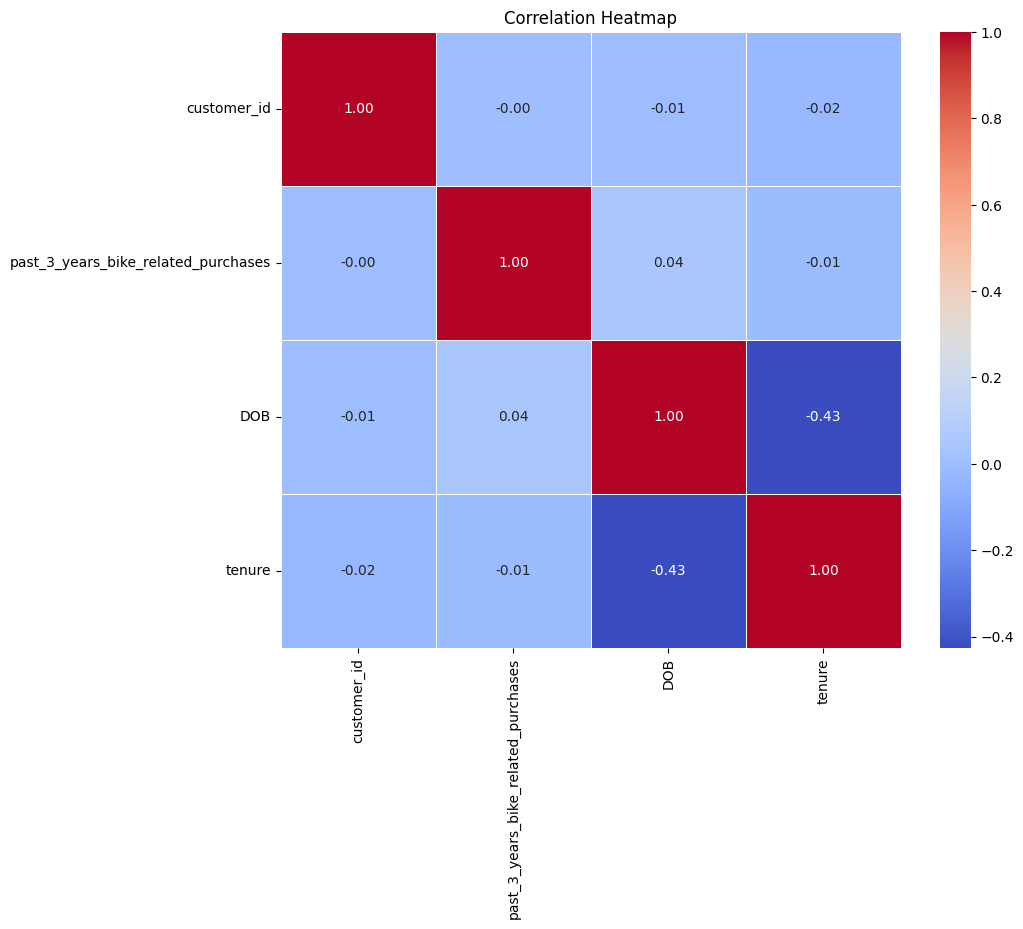

In [22]:
numeric_df = df.select_dtypes(include=['float64', 'int64','datetime64[ns]'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In the analysis, it is observed that the Date of Birth (DOB) feature does not exhibit any correlation with other numeric features in the dataset. This lack of correlation can be attributed to the following factors:

**Nature of Date of Birth:** The DOB feature represents individual birth dates, which are typically unique and unrelated to other numeric features in the dataset. Unlike numerical variables such as age or income, which may exhibit correlations with other features, DOB is a categorical variable representing specific dates.

**Handling Missing Values:** We chose to drop rows with missing DOB values rather than imputing them with any method. This decision could have contributed to the lack of correlation observed. By dropping rows with missing DOB values, we reduced the sample size for correlation analysis, potentially diminishing the statistical power to detect correlations.

**Imputation Method:** Imputation methods for missing DOB values, such as filling with mean or median values, may not be appropriate due to the unique nature of birth dates. Imputing missing DOB values with mean or median dates would introduce artificial patterns and potentially bias the analysis.

**Context of the Analysis:** Depending on the specific context of the analysis, DOB may not be expected to correlate strongly with other features. For example, in customer segmentation or marketing analytics, birth dates may not directly influence purchasing behavior or demographic characteristics.

Overall, the lack of correlation in the DOB feature underscores the unique nature of birth dates and the importance of thoughtful handling of missing values in the analysis. While correlations are a valuable tool for exploring relationships between numeric variables, it is essential to consider the context and characteristics of individual features when interpreting correlation results.

In [23]:
dob_index_drop = df[df['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [24]:
df.drop(index=dob_index_drop, inplace=True, axis=0)
df['DOB'].isnull().sum()


0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   full_name                            3913 non-null   object        
 2   gender                               3913 non-null   object        
 3   past_3_years_bike_related_purchases  3913 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3416 non-null   object        
 6   job_industry_category                3257 non-null   object        
 7   wealth_segment                       3913 non-null   object        
 8   deceased_indicator                   3913 non-null   object        
 9   default                              3698 non-null   object        
 10  owns_car         

**Analyze 'job_title', 'job_industry_category', and 'default' columns**

In [26]:
print("Job Title Value Counts:")
print(df['job_title'].value_counts())

print("\nJob Industry Category Value Counts:")
print(df['job_industry_category'].value_counts())

print("\nDefault Value Counts:")
print(df['default'].value_counts())

Job Title Value Counts:
job_title
Business Systems Development Analyst    43
Tax Accountant                          43
Social Worker                           42
Recruiting Manager                      41
Internal Auditor                        40
                                        ..
Database Administrator II                4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

Job Industry Category Value Counts:
job_industry_category
Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

Default Value Counts:
default
100                                       113
1                                         112
-1          

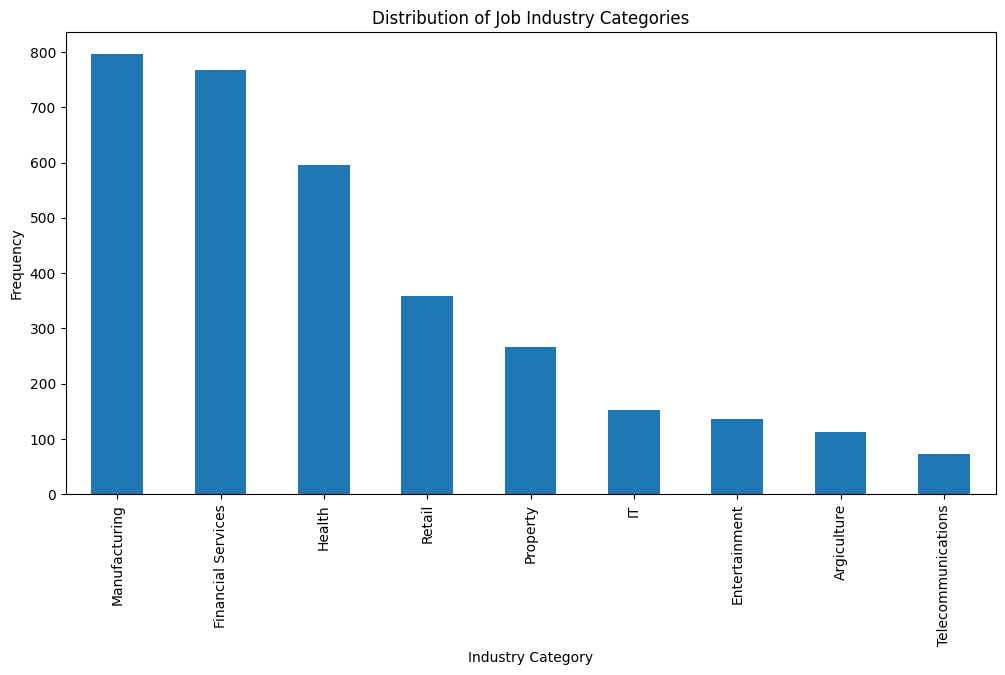

In [28]:

# Plot the distribution of job industry categories
plt.figure(figsize=(12, 6))
df['job_industry_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Industry Categories')
plt.xlabel('Industry Category')
plt.ylabel('Frequency')
plt.show()

**Handling Missing Values in Job Title and Job Industry Category**
In this step, we are filling missing values in the "job_title" and "job_industry_category" columns with the placeholder value "Missing". We are doing this because the dataset is intended for use in a dashboard where missing values may impact visualizations and analysis.

**Reasoning**:
**Dashboard Visualization**: Missing values in the "job_title" and "job_industry_category" columns could lead to incomplete or misleading visualizations in a dashboard. Filling missing values with a placeholder allows us to include these records in visualizations without affecting the interpretation of the data.

**Preserving Data Integrity**: While imputation methods could be used in machine learning models to preserve data integrity, for the purposes of dashboard visualization, filling missing values with a placeholder ensures that the original data is retained without distortion.

**User Understanding**: Users of the dashboard may not require imputation techniques. By filling missing values with a placeholder, we provide a clear indication that the data for these records is unavailable without delving into complex imputation methods.

In [31]:
df['job_title'].fillna('Missing', inplace=True, axis=0)
df['job_industry_category'].fillna('Missing', inplace=True, axis=0)

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_12456\2179829168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_title'].fillna('Missing', inplace=True, axis=0)
C:\Users\Sagnik\AppData\Local\Temp\ipykernel_12456\2179829168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [38]:
df.drop(columns=['default'], inplace=True)

df.head()

,customer_id,full_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0


**Lets add a column Age**

In [39]:
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['DOB'].apply(age)

C:\Users\Sagnik\AppData\Local\Temp\ipykernel_12456\199159397.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

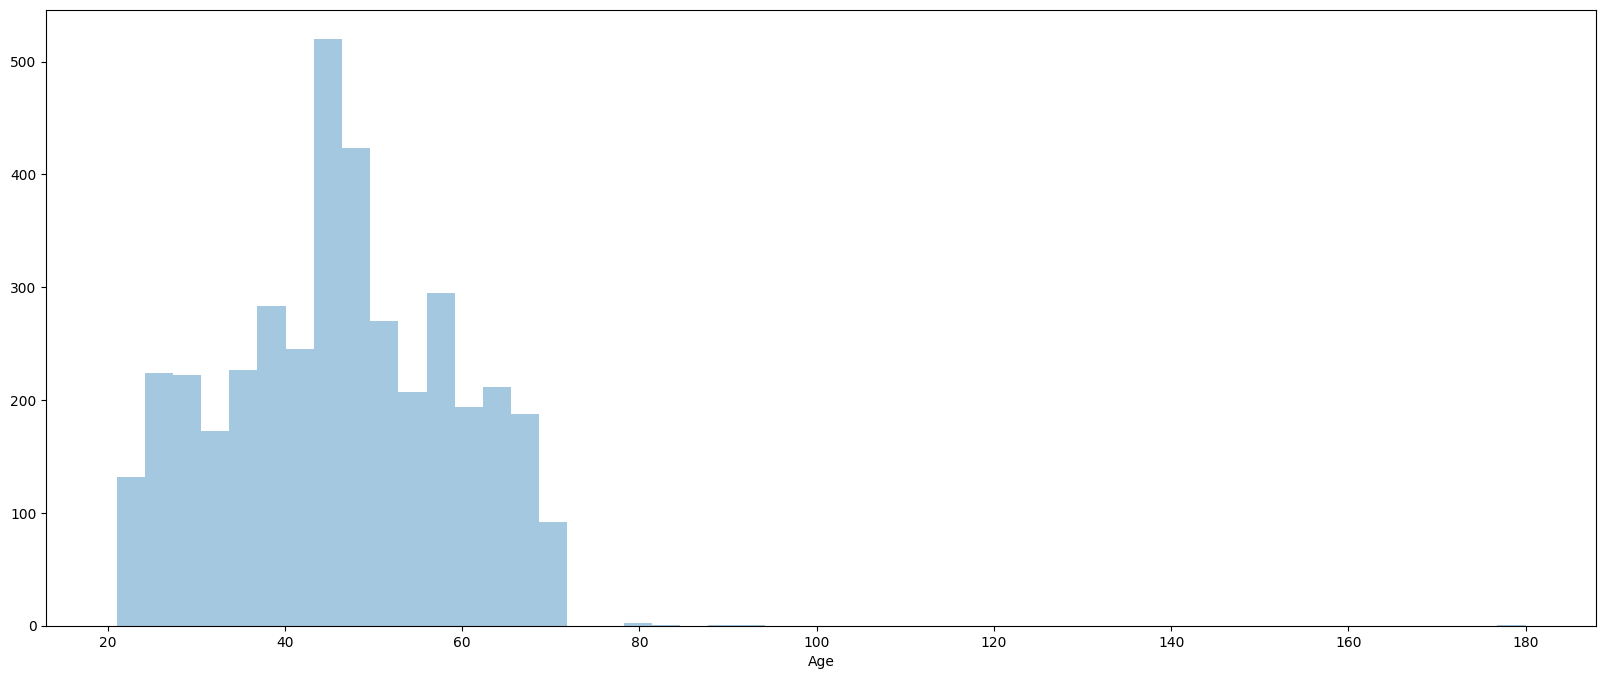

In [40]:
# Viz to find out the Age Distribution
plt.figure(figsize=(20,8))
sns.distplot(df['Age'], kde=False, bins=50)

In [41]:
df['Age'].describe()


count    3913.000000
mean       46.135190
std        12.797617
min        21.000000
25%        37.000000
50%        46.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

Here we find there is only 1 customer with an age of 180. Clearly this is an outlier since the 75th percentile of Age is 56.



In [42]:
age_index_drop = df[df['Age']>100].index

df.drop(index=age_index_drop, inplace=True , axis=0)

## Inconsistency Check in Data
We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

In [44]:
df['gender'].value_counts()



gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [45]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

df['gender'] = df['gender'].apply(replace_gender_names)

In [46]:
df['wealth_segment'].value_counts()


wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

In [47]:
df['deceased_indicator'].value_counts()


deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

In [48]:
df['owns_car'].value_counts()


owns_car
Yes    1974
No     1938
Name: count, dtype: int64

## Exporting the Cleaned Customer Demographic Data Set to csv
Currently the Customer Demographics dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [49]:
df.to_csv('../data/CustomerDemographics.csv', index=False)